Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [1]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [2]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [3]:
pd.options.display.max_colwidth = 500
train.sample(5)

,id,description,ratingCategory
759,2460,"\nThe peated sibling to Heritage generates a nose of woodsmoke, incense sticks, oiled leather, and peppercorns. This has a thick mouthfeel of honey, peat smoke, and spiced pears. The spices put on quite a show to keep the fruits at bay, but when it settles down, the common theme of pears in cream comes through in the end. The spices return to harangue the tongue in the finish. (225 bottles for the U.S.)",1
3210,4298,"\nBright gold. Very citric, sweet candied orange and tangerine marmalade, with a hint of pink grapefruit. As I said, citric. There’s meadow hay and some sherbet as well. Water brings out lucerne grass. The palate is equally delicate and ‘up,’ and quite acidic (no bad thing) with light, nutty chocolate and macadamia nut. When diluted, there’s poached pear and charred oak. The finish is effervescent. Light, easy-going, keenly priced. The rehabilitation of Cardhu continues. £41",0
1065,4597,"\nA blend of aged (sourced) bourbon and Great Lakes’ own (young) malt whiskey. Quite sweet on the nose; a rich, herbal sweetness with a strong, youthful quality to it. Interestingly medicinal on the tongue as the herbal character swells. A full mouthfeel, with clear references to new make about it: a bit oily, grassy, and bright. The finish is the best part: minty and a bit drying, a pleasant farewell. Interesting concept.",0
2352,3973,"\nThere's big oak, caramel, cinnamon and clove spice, and fresh grain in the nose; not a shy, soft wheat whiskey at all. Good body, supporting spiciness, mint, and young oak; the small barrel punches, tempered by sweet grain and spice. Finish gets a bit dusty and astringent, crimping things. Wood-balanced, not dominated by it. Bold, dynamic.",0
3864,586,"\nAmber color with shades of chestnut. Full, complex aromas of fruit (cherries, currants, berries), marzipan, Demerara sugar, roasted nuts, and molasses. Full in body, with flavors that deliver what its aroma promised. Satisfying finish.",1


In [4]:
from explore_data import get_num_words_per_sample 
from explore_data import plot_sample_length_distribution
from explore_data import plot_class_distribution
from explore_data import plot_frequency_distribution_of_ngrams
import seaborn as sns
sns.set()

In [5]:
median_words_per_sample = get_num_words_per_sample(train.description.values)
print(f'Median words per sample: {median_words_per_sample}')

Median words per sample: 70.0


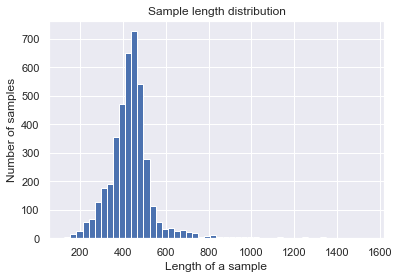

In [6]:
plot_sample_length_distribution(train.description.values)

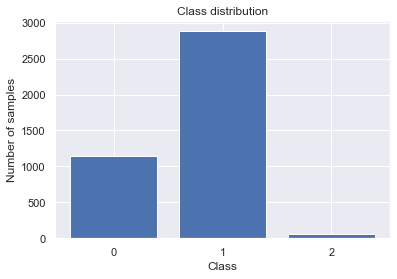

In [7]:
plot_class_distribution(train.ratingCategory.values)

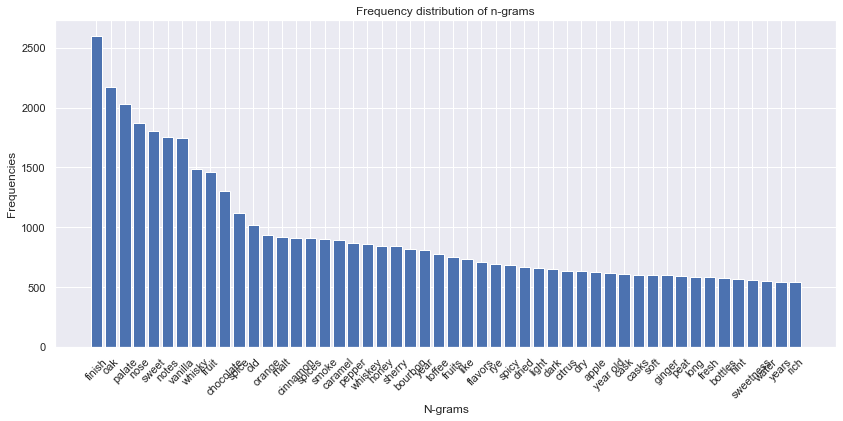

In [8]:
plot_frequency_distribution_of_ngrams(train.description.values,
                                      ngram_range=(1, 2),
                                      num_ngrams=50)

In [9]:
sw_ratio = len(train.description.values) / median_words_per_sample
print(f'Number of Samples / Median Words per Sample ratio: {int(sw_ratio)}')

Number of Samples / Median Words per Sample ratio: 58


In [10]:
review_texts = train['description'].tolist()
review_target = train['ratingCategory'].tolist()

In [11]:
len(review_target),len(review_texts)

(4087, 4087)

In [12]:
train.ratingCategory.value_counts()

1    2881
0    1141
2      65
Name: ratingCategory, dtype: int64

### Define Pipeline Components

In [13]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

In [14]:
from sklearn.svm import LinearSVC
vect = TfidfVectorizer(stop_words='english', 
                       ngram_range=(1,2),
                       min_df=2,
                       max_df=0.25)
svm = LinearSVC()

pipe = Pipeline([
    ('vect', vect), 
    # SelectKBest()
    ('svm', svm)
])

In [15]:
import pandas as pd

# Get sparse dtm
dtm = vect.fit_transform(review_texts)

# Convert to dataframe
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm.shape)
dtm.head()

(4087, 26187)


,000,000 700,000 bottles,000 cases,020,020 bottles,060,060 bottles,080,080 bottles,...,zippy,zippy bright,zone,zuidam,zuidam distillers,zuidam distillery,ànima,ànima negra,ìle,ìle 2016
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
parameters = {
    'vect__max_df': (0.3, 0.5),
    'vect__min_df': (2, 5, 10),
    'vect__max_features': (5000, 20000),
    'svm__penalty': ('l1','l2'),
    'svm__C': (0.1, 0.5, 1., 2.)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(review_texts, review_target)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   46.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.25,
                                                        max_features=None,
                                                        min_df=2,
                                                        ngram_range=(1, 2),
                                                        n

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [17]:
grid_search.best_score_

0.7575254449309149

In [18]:
grid_search.best_params_

{'svm__C': 0.5,
 'svm__penalty': 'l2',
 'vect__max_df': 0.5,
 'vect__max_features': 20000,
 'vect__min_df': 2}

In [19]:
# Extract the vectorizer and model from grid_search pipeline
best_model = grid_search.best_estimator_
vect = best_model.named_steps['vect']
clf = best_model.named_steps['svm']

In [20]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [21]:
import eli5

eli5.show_weights(clf, vec=vect, top=20)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [22]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [23]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [24]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [25]:
subNumber = 0

In [26]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 80% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [27]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=10)

In [28]:
# build a pipeline, incorporate SVD, and run a gridsearch 
# Define the Pipeline
vect = TfidfVectorizer(stop_words='english', 
                       ngram_range=(1,2),
                       min_df=2,
                       max_df=0.3)
svm = LinearSVC(C=0.5, 
                penalty='l2')

pipe = Pipeline([
    ('vect', vect),      # TF-IDF Vectorizer
    ('svd', svd),        # LSI (SVD Dim Reduction)
    ('svm', svm)         # LinearSVC Classifier
])
pipe

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.3, max_features=None,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svd',
                 TruncatedSVD(algorithm='randomized', n_components=2, n_iter=10,
                              random_state=None, tol=0.0)),
                ('svm'

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [30]:
parameters = {
    'vect__max_features': (10000, 20000),
    'svd__n_components': (100, 500),
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(review_texts, review_target)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.3,
                                                        max_features=None,
                                                        min_df=2,
                                                        ngram_range=(1, 2),
                                                        no

### Make a Submission File

In [42]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [32]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [33]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [34]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [35]:
# Apply to your Dataset

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint

param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [36]:
# Continue Word Embedding Work Here
import spacy
import pandas as pd

# load in pre-trained glove model 
nlp = spacy.load("en_core_web_md")

In [37]:
def get_avg_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [38]:
X = get_avg_word_vectors(review_texts)
len(X) == len(review_texts)

True

In [39]:
svm = LinearSVC(C=0.5, penalty='l2')
svm.fit(X, review_target)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Make a Submission File

In [44]:
# Predictions on test sample
X_test = get_avg_word_vectors(test['description'])
len(X_test) == len(test['description'])

True

In [45]:
pred = svm.predict(X_test)

In [46]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [47]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [48]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 80% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?